# Download the Data

+ To Download Data we can Define a General Function
+ as follows

In [1]:
import os         ## provides functions to creating and removing directories
import tarfile    ## to read and write tar archives
import urllib     ## used to fetch urls

In [2]:
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join("datasets","housing")
print(HOUSING_PATH)
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedir(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
## define a function to fetch the data to pandas dataframe

import pandas as pd


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

datasets\housing


In [3]:
housing=load_housing_data()
housing.head()

FileNotFoundError: [Errno 2] File datasets\housing\housing.csv does not exist: 'datasets\\housing\\housing.csv'

In [4]:
## fetch data from the given csv file in the Environment
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


There are 10 Attributes.

+ longitude - Numerical Value
+ latitude - Numerical Value
+ housing_median_age = Numerical Value
+ total_rooms = Numerical Value
+ total_bedrooms = Numerical Value
+ population = Numerical Value
+ households = Numerical Value
+ median_income = Numerical Value
+ median_house_value = Numerical Value
+ ocean_proximity = Categorical Value

Check the Information of the Data by data.info() method.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


+ Check the number of Counts for all attributes in the data.
+ there are 20640 entries in all columns.
+ in the column, total bedrooms, the number is lesser.
+ so it contains missing values.

Check the different Categories of Categorical Attribute.

+ ocean proximity is Categorical Attribute.
+ the categories are 
    + <1H OCEAN
    + INLAND
    + NEAR OCEAN
    + NEAR BAY
    + ISLAND 

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Check the Summary of all Numerical data points by data.describe() method. It will give 

+ count - number of datapoints in a column
+ mean - mean value of that attribute.
+ std (standard deviation) - 
+ min - minimum value in the column
+ max - maximum value in tha column
+ 25, 50, 75 percentiles.

+ **median_house_value** is the target value in the Project.
+ total_bedrooms have missing values

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


PLot the Histogram to know the Distribution of every Attributes

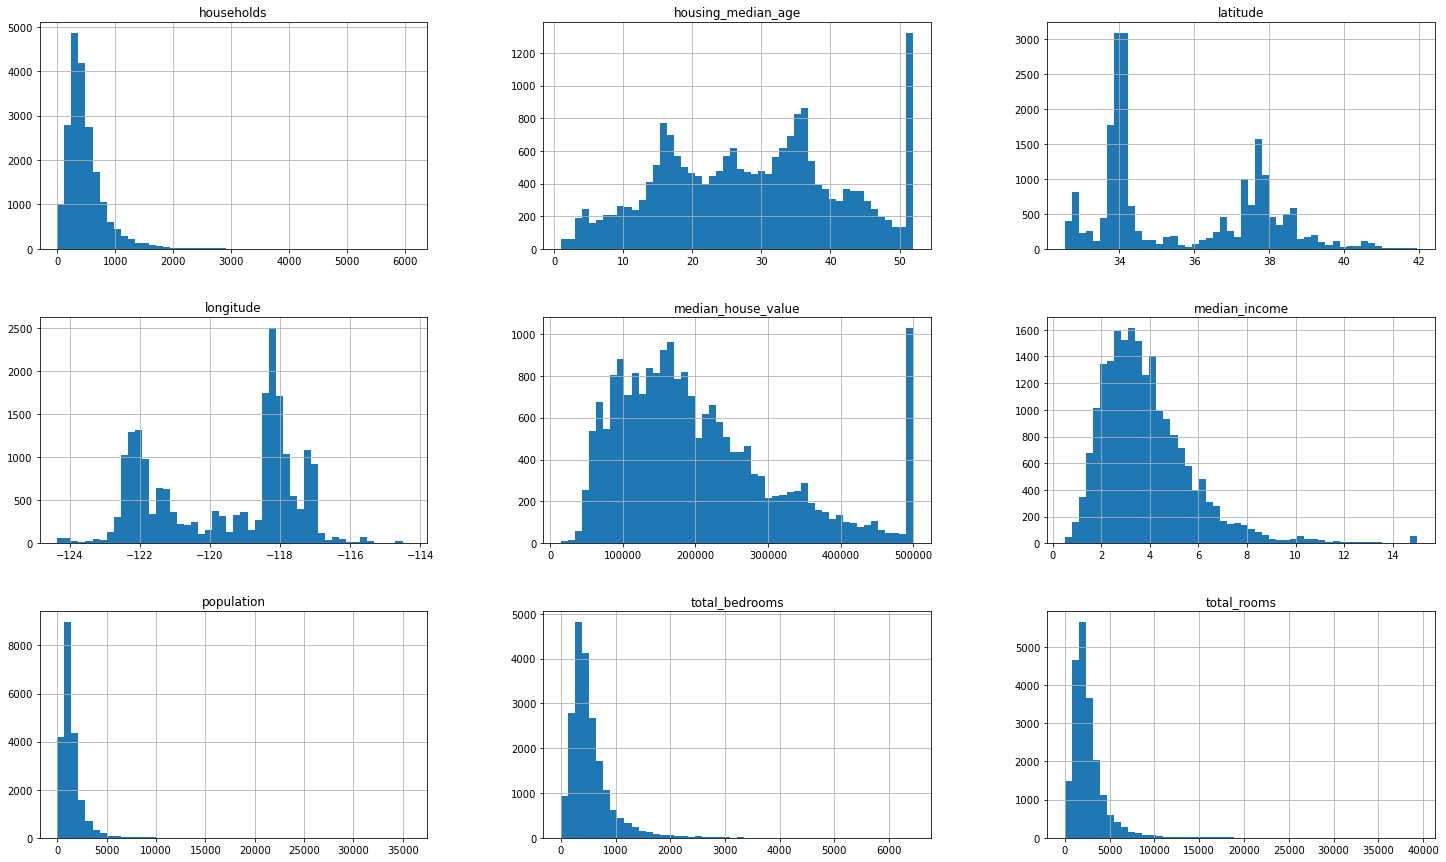

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(25,15))
plt.show()

+ median_income_attribute is capped.
+ look at the data in the dataframe.
+ it is capped to 0.5-15 scale.
+ So, 15 means - 150000 and 3 means 30000

Similarly, check for all other attributes as well.


### CREATE A TEST SET

What is Data Snooping Bias??

+ when you estimate the Generelization Error using the test set.
+ Your Estimate will be too optimistic.
+ And you will launch a System that will not perform as well as expected.
+ This is Called Data Snooping Bias.

In [24]:
## function to split the data to training set and test set.

import random
import numpy as np

def split_train_test(data, test_ratio):
    ## shuffle the entire dataset.
    shuffled_indices = np.random.permutation(len(data))
    ## define test set size 
    test_set_size = int(len(data) * test_ratio)
    ## slice the train set indices from shuffled indices upto test_set_size
    train_indices = shuffled_indices[test_set_size:]
    ## slice the test set indices from shuffled indices from test_set_size
    test_indices = shuffled_indices[:test_set_size]
    ## return the train and test indices.
    return data.iloc[train_indices], data.iloc[test_indices]

In [25]:
## split the data to train and test sets.
train_set, test_set = split_train_test(housing,test_ratio=0.2)
print("Length of the Training Set:--",len(train_set))
print("Length of the Testing Set:--",len(test_set))

Length of the Training Set:-- 16512
Length of the Testing Set:-- 4128


In [27]:
#print(test_set)

By looking at the Data sets, every time we rerun the codes, we will get new data.
+ So, when we run the model again and again. The ML model will learn all the data.
+ So the Output will be Biased.

In [35]:
from zlib import crc32 

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [36]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [37]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id,test_ratio=0.2,id_column="index")

In [33]:
print(len(train_set))
print(len(test_set))

16512
4128


In [38]:
print(train_set)

       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
6          6    -122.25     37.84                52.0       2535.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401

In [40]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set,test_set = split_train_test_by_id(housing_with_id,test_ratio=0.2,id_column="id")

print(train_set)
print(test_set)

       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
2          2    -122.24     37.85                52.0       1467.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20637  20637    -121.22     39.43                17.0       2254.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401

**Scikit-Learn**

+ Scikit-Learn provides a few functions.
+ Simplest function is train_test_split()
+ here, there is a random_state parameter will allow you to set random generator seed.
+ You can pass multiple datasets with identical number of rows, and it will split them on the same indices.

In [41]:
## import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [42]:
print(len(train_set))
print(train_set)

print(len(test_set))
print(test_set)

16512
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income 

What is Stratified Sampling.

+ Type of Sampling method, in which the total number of Population is divided into smaller groups or strata to complete the Sampling Process.
+ Sampling method that reduces that Sampling Error in cases where population can be partitioned into Subgroups.

Here the Population is divided into Homogeneous Subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of overall population.

+ Suppose you chatted with Experts.
+ Understood that median_income is a very important attribute to predict median_housing_price.
+ So, you want to ensure that the test set is representative of various categories of income in whole dataset.
+ SInce the median_income is a continuous numerical attribute.
+ First, Classify that.
+ As you can see, the income is mostly Clustered around 1.5 to 6.
+ But there are data further more from 6 to 15.
+ So we need to Classify the Entire data to CLasses.
+ And need to do the sampling Accordingly.


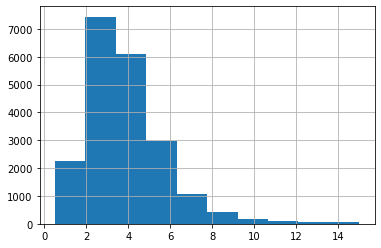

In [43]:
housing["median_income"].hist()

In [46]:
## classifying the income category.
## adding a new column called income_cat ranging values from 1-5
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0.,1.5,3.0,4.5,6., np.inf],
                              labels = [1,2,3,4,5])

In [47]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


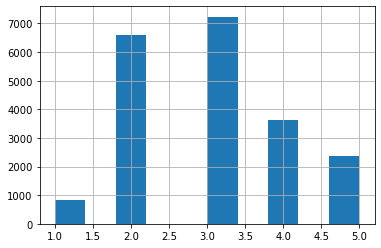

In [49]:
housing["income_cat"].hist()

Now do the Stratified Sampling based on the Income Category.

+ Use Scikit-Learn StratifiedShuffleSplit class.
+ 

In [55]:
## import StratifiedShuffleSplit class from sklearn.model_selection
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index,test_index in split.split(housing, housing["income_cat"]):
    print(train_index), print(test_index)
    print(len(train_index)), print(len(test_index))
    
    strat_train_set = housing.loc[train_index]
    print(strat_train_set)
    strat_test_set = housing.loc[test_index]
    print(strat_test_set)

[17606 18632 14650 ... 13908 11159 15775]
[ 5241 10970 20351 ...  4019 12107  2398]
16512
4128
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77          

These are Stratified Sample.

+ Checking whether it is worked as Expected.
+ By Checking the income category Proportions

In [57]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [60]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Remove the income_cat column to make data as Previous.

In [61]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)
    
    print(strat_train_set)
    print(strat_test_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

In [62]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In Housing there is still 11 columns. But in the Stratified Samples there is only 10 columns.